Heston model:
$$
\begin{cases}
&\dfrac{dS_t}{S_t} = r dt + \sqrt{v} dW^1_t\\
&d v_t = \kappa(\theta - v_t) dt + \sigma \sqrt{v} dW^2_t\\
&S_t = s, v_t = v; dW^1dW^2 = \rho dt
\end{cases}
$$
In this variables PDE for put option price read as follow:
$$
\begin{cases}
&V_t + s r V_s + \kappa (\theta - v) V_v + 0.5 s^2 v V_{ss} + 0.5 \sigma^2 v V_{vv} + \rho S \sigma v V_{sv} = rV, s \geq 0, v \geq 0, 0 \leq t \leq T\\
&V(T, s, v) = G(s, v) = (K-s)^+\\
&V(t, 0, v) = K\\
&V(t, \infty, v) = 0\\
&V_v(t, s, 0) = V_v(t, s, \infty) = 0
\end{cases}
$$
Consider the following variable transformition:
$$
X_t = \log S_t - \log K, v_t = y_t \sigma
$$
In new variables:
$$
\begin{cases}
&d X_t = (r - 0.5 y_t \sigma) dt + \sqrt{\sigma y_t} dW^1_t \\
&d y_t = \kappa \dfrac{\theta - y_t \sigma}{\sigma} + \sqrt{\sigma y_t} dW^2_t
\end{cases}
$$In this variables PDE reads as follow:
$$
V_t + (r-0.5 y\sigma) V_x + \kappa \dfrac{\theta - y \sigma}{\sigma} V_y + 0.5 \sigma y (V_{xx} + V_{yy}) + \rho \sigma y_t V_{xy} = r V
$$
Consider change $t = T-t, H = e^{rt}V / K$, then we have:
$$
\begin{cases}
&H_t = (r-0.5 y\sigma) H_x + \kappa \dfrac{\theta - y \sigma}{\sigma} H_y + 0.5 \sigma y (H_{xx} + H_{yy}) + \rho \sigma y_t H_{xy}\\
&H(0, x, y) = (1-e^{x})^+\\
&H(t, -\infty, v) = 1\\
&H(t, \infty, v) = 0\\
&H_y(t, x, 0) = H_y(t, x, \infty) = 0
\end{cases}
$$

Ограничим области до прямоугольника $x \in [-X, X], y\in [0, Y]$. Условия на бесконечности перенесём в конечную точку, при этом положим $H(t, -X, y) = 1-e^{-X}$, что вполне логично, так как если $x = -X$, то опцион глубоко в деньгах, и с вероятностью, близкой к единице он будет исполнен. Для удобства будем обозначать неизвестную функцию на текущем слое через $u$, а на следующем через $\hat{u}$. Для индексации пространственных переменных $x, y$ будем использовать соответственно индексы $n, m$. По умолчанию подразумеваются индексы $n, m$. 

Введём сеточные функции $u_{n, m}(t) = u(t) = H(t, x_n, y_m)$. Аппроксимируем производные в правой части конечными разностями, получим выражение:
$$\begin{cases}
&\dfrac{du}{dt} = \mu_x u_x + \mu_y u_y + 0.5 \sigma y (u_{xx} + u_{yy}) + \rho \sigma y u_{xy} = F(u)\\
&u(0) = \left( 1 - e^{x_n}\right)^+\\
&u_{0, m} = 1-e^{-X}, m=\overline{0, M}\\
&u_{N, m} = 0, m=\overline{0, M}\\
&u_{n, 0} = u_{n, 1}, n=\overline{0, N}\\
&u_{n, M-1} = u_{n, M}, n=\overline{0, N}
\end{cases}
$$Получили ОДУ. Построим явную схему, например, схему эйлера. На каждом шаге будем находить значения $u_{n, m}$ при $n\in \{1, N-1\}, m\in \{1, M-1\}$, затем будем восстанавливать граничные условия. Для схемы эйлера получим:
$$
\hat{u} = u + \tau * F(u)
$$где $\tau$ -- шаг по времени. Аналогично можно построить схему более высокого порядка, например схему Рунге-Кутты 4 порядка по времени. Главный недостаток явных схем является их условная устойчивость, они накладывают ограничения на шаг по времени $\tau \leq h^2$. Поэтому на практике они не применимы. Неявные схемы применять сложно, так как при переходе со слоя на слой приходится решать слау порядка $N_x N_y$. Для эффективного решения параболических задач используется метод переменных направлений. При этом вводиться промежуточный слой $t+0.5\tau$, вначале мы переходим с исходного слоя на промежуточный, используя схему, неявную по направлению $x$ и явную по направлению $y$. Затем направления меняются. Таким образом, при переходе со слоя на слой всё сводится к решению большого числа СЛАУ с трёхдиагональной матрицей, которые можно эффективно решать методом прогонки. К построению такого метода мы сейчас и перейдём. Главная сложность конкретно данной задачи является наличие смешанных производных. 

Рассмотрим их подробнее:
$$
u_{xy} = \dfrac{u_{n+1, m+1} - u_{n - 1, m + 1} - u_{n + 1, m - 1} + u_{n-1, m-1}}{4 h_x h_y}
$$
Рассмотрим аппроксимацию, неявную по $x$ и явную по $y$:
$$
u_{xy} = \dfrac{u_{n + 1, m + 1} - u_{n - 1, m + 1} - \hat{u}_{n + 1, m - 1} + \hat{u}_{n-1, m-1}}{4 h_x h_y} =
\dfrac{(u_x)_{n, m+1} - (\hat{u}_x)_{n, m - 1} }{2 h_y}
$$Так как при переходе на промежуточный слой мы последовательно решаем задачу для всех $m$, то но текущем шаге мы уже знаем значения $\hat{u}_{n\pm 1, m - 1}$. Исключение составит лишь первый слой при $m=1$, но в нём, из граничных условий мы знаем, что 
$$
u_{n, 1} = u_{n, 0}
$$так что всё заебок. Будем также обозначать промежуточный слой $\hat{u}$. Имеем:
$$
\dfrac{\hat{u} - u}{0.5 \tau} = \mu_x \hat{u}_x + \mu_y {u}_y + 0.5 \sigma y \hat{u}_{xx} + 0.5 \sigma y u_{yy} + \rho \sigma y \dfrac{(u_x)_{n, m+1} - (\hat{u}_x)_{n, m - 1} }{2 h_y}
$$
Пусть $m \geq 2$ -- фиксированно. Тогда $(\hat{u}_x)_{n, m - 1}$ уже известно, тогда перенося всё неизвестное в правую сторону, а известное в левую, получим:
$$
\hat{u} - 0.5\tau \mu_x \hat{u}_x - 0.25\tau \sigma y \hat{u}_{xx} =
u + 0.5 \tau \left( \mu_y {u}_y + 0.5 \sigma y u_{yy}  + \rho \sigma y \dfrac{(u_x)_{n, m+1} - (\hat{u}_x)_{n, m - 1} }{2 h_y} \right) = F_n
$$
Раскрывая разностные производные в левой части, получим:
$$
\begin{cases}
&\text{lhs} = \hat{u}_n - \dfrac{\tau \mu_x}{4 h_x}\left( \hat{u}_{n+1} - \hat{u}_{n-1} \right) - \dfrac{\tau \sigma y }{4 h_x^2}\left( \hat{u}_{n+1} - 2 \hat{u}_{n} + \hat{u}_{n-1} \right) = \\
&= \hat{u}_n\left( 1 + \dfrac{\tau \sigma y }{2 h_x^2}\right) + 
\hat{u}_{n-1} \left( \dfrac{\tau \mu_x}{4 h_x} - \dfrac{\tau \sigma y }{4 h_x^2} \right) +
\hat{u}_{n+1} \left( -\dfrac{\tau \mu_x}{4 h_x} - \dfrac{\tau \sigma y }{4 h_x^2} \right) = \\
& C_{n} \hat{u}_{n-1} + A_n \hat{u}_{n} + B_n \hat{u}_{n+1}
\end{cases}
$$где для коэффициентов $A_n, B_n, C_n$ верны выражения:
$$
\begin{cases}
&A_n = 1 + \dfrac{\tau \sigma y }{2 h_x^2}\\
&B_n =  -\dfrac{\tau \mu_x}{4 h_x} - \dfrac{\tau \sigma y }{4 h_x^2} = -\dfrac{\tau }{4 h_x} \left( \mu_x + \dfrac{\sigma y}{h_x}\right)\\
&C_n = \dfrac{\tau \mu_x}{4 h_x} - \dfrac{\tau \sigma y }{4 h_x^2}  = -\dfrac{\tau }{4 h_x} \left( -\mu_x + \dfrac{\sigma y}{h_x}\right)
\end{cases}, n=1, \ldots, N-1
$$
Правая часть имеет вид:
$$
    F_n = u+ 0.5 \tau \left( \mu_y {u}_y + 0.5 \sigma y u_{yy}  + \rho \sigma y \dfrac{(u_x)_{n, m+1} - (\hat{u}_x)_{n, m - 1} }{2 h_y} \right) 
$$
Чтобы удовлетворить граничные условия по $x$, положим коэффициенты: $A_0 = 1,0 B_0 = 0, F_0 = 1-e^{-X}, A_N = 1, C_0 = 0, F_N = 0$. Такой выбор коэффициентов позволит выполнить граничные условия автоматически.
В итоге для всех $m=2, \ldots, M-1$ имеем систему:
$$
C_{n} \hat{u}_{n-1} + A_n \hat{u}_{n} + B_n \hat{u}_{n+1} = F_n, n=\overline{0, N}
$$которую можно эффективно решить с помощью метода прогонки за $O(N_x)$ операций. Всего таких систем $N_y$, итого сложность перехода будет $O(N_x N_y)$. Решение при $m=M$ находится из граничных условий:
$$
\hat{u}_{n, M} = \hat{u}_{n, M-1}
$$Осталось разобраться со случаем $m=1$. В этом случае мы не знаем $\hat{u}_{n, m-1}$, но из равенства нулю производной мы знаем:
$$
\hat{u}_{n, 0} = \hat{u}_{n, 1}
$$поэтому мы можем подставить это прямо в систему. Итого получим немного другую задачу:
$$
\dfrac{\hat{u} - u}{0.5 \tau} = \mu_x \hat{u}_x + \mu_y {u}_y + 0.5 \sigma y \hat{u}_{xx} + 0.5 \sigma y u_{yy} + \rho \sigma y \dfrac{(u_x)_{n, m+1} - (\hat{u}_x)_{n, m} }{2 h_y}
$$Проделывая с ней те же процедуры, получим
$$
\hat{u} - 0.5\tau \mu_x \hat{u}_x - 0.25\tau \sigma y \hat{u}_{xx} + \dfrac{\tau \rho \sigma y}{4 h_y}\hat{u}_x =
u + 0.5 \tau \left( \mu_y {u}_y + 0.5 \sigma y u_{yy}  + \rho \sigma y \dfrac{(u_x)_{n, m+1} }{2 h_y} \right) = F_n
$$Таким образом, при $m=1$, у нас немного поменяются коэффициенты:

$$
\begin{aligned}
&A_n = 1 + \dfrac{\tau \sigma y }{2 h_x^2}\\
&B_n =  -\dfrac{\tau \mu_x}{4 h_x} - \dfrac{\tau \sigma y }{4 h_x^2} + \dfrac{\tau \rho \sigma y}{8 h_y h_x} = -\dfrac{\tau }{4 h_x} \left( \mu_x + \dfrac{\sigma y}{h_x}\right) + \dfrac{\tau \rho \sigma y}{8 h_y h_x}\\
&C_n = \dfrac{\tau \mu_x}{4 h_x} - \dfrac{\tau \sigma y }{4 h_x^2} - \dfrac{\tau \rho \sigma y}{8 h_y h_x} = -\dfrac{\tau }{4 h_x} \left( -\mu_x + \dfrac{\sigma y}{h_x}\right) -\dfrac{\tau \rho \sigma y}{8 h_y h_x}\\
&F_n = u + 0.5 \tau \left( \mu_y {u}_y + 0.5 \sigma y u_{yy}  + 0.5 \rho \sigma y \dfrac{(u_x)_{n, m+1} }{h_y} \right)
\end{aligned}
$$
Граничные условия для коэффициентов такие же. 

Всё, удачно перебрались на промежуточный слой. Сейчас будем перебираться на слой $t + \tau$. Переобозначим $u$ за значение на промежуточном слое, а $\hat{u}$ на значение на слое $t+\tau$. Аналогично записывается уравнение:
$$
\dfrac{\hat{u} - u}{0.5 \tau} = \mu_x {u}_x + \mu_y \hat{u}_y + 0.5 \sigma y {u}_{xx} + 0.5 \sigma y \hat{u}_{yy} + \rho \sigma y \dfrac{(u_y)_{n + 1, m} - (\hat{u}_y)_{n - 1, m} }{2 h_x}
$$

Перенося всё неизвестное в правую сторону, а известное в левую, получим:
$$
\hat{u} - 0.5\tau \mu_y \hat{u}_y - 0.25\tau \sigma y \hat{u}_{yy} =
u + 0.5 \tau \left( \mu_x {u}_x + 0.5 \sigma y u_{xx}  + 0.5 \rho \sigma y \dfrac{(u_y)_{n + 1, m} - (\hat{u}_y)_{n - 1, m} }{h_x} \right) = F_n
$$
Раскрывая разностные производные в левой части, получим:
$$
\begin{cases}
&\text{lhs} = \hat{u}_n - \dfrac{\tau \mu_y}{4 h_y}\left( \hat{u}_{m+1} - \hat{u}_{m-1} \right) - \dfrac{\tau \sigma y }{4 h_y^2}\left( \hat{u}_{m+1} - 2 \hat{u}_{m} + \hat{u}_{m-1} \right) = \\
&= \hat{u}_m\left( 1 + \dfrac{\tau \sigma y }{2 h_y^2}\right) + 
\hat{u}_{m-1} \left( \dfrac{\tau \mu_y}{4 h_y} - \dfrac{\tau \sigma y }{4 h_y^2} \right) +
\hat{u}_{m+1} \left( -\dfrac{\tau \mu_y}{4 h_y} - \dfrac{\tau \sigma y }{4 h_y^2} \right) = \\
& = C_{m} \hat{u}_{m-1} + A_m \hat{u}_{m} + B_m \hat{u}_{m+1}
\end{cases}
$$где для коэффициентов $A_m, B_m, C_m$ верны выражения:
$$
\begin{cases}
&A_m = 1 + \dfrac{\tau \sigma y }{2 h_y^2}\\
&B_m =  -\dfrac{\tau \mu_y}{4 h_y} - \dfrac{\tau \sigma y }{4 h_y^2} = -\dfrac{\tau }{4 h_y} \left( \mu_y + \dfrac{\sigma y}{h_y}\right)\\
&C_m = \dfrac{\tau \mu_y}{4 h_y} - \dfrac{\tau \sigma y }{4 h_y^2}  = -\dfrac{\tau }{4 h_y} \left( -\mu_y + \dfrac{\sigma y}{h_y}\right)
\end{cases}, m=1, \ldots, M-1
$$Для того, чтобы выполнялись однородные условия Неймана, положим:
$$
A_0 = 1, B_0 = -1, F_0 = 0 \quad A_M = 1, C_M = -1, F_M = 0
$$

Допустим, мы знаем функцию $F(S) = (1-\dfrac{S}{K_0})^+$, т.е. выплату опциона для фиксированного страйка, как функцию от переменной $S$. Хотим узнать, какому страйку это соответствует, при $S = S_0$. Имеем:
$$
\dfrac{S}{K_0} = \dfrac{S_0}{K}
$$откуда $K = K_0 \dfrac{S_0}{S}$. Таким образом, если есть ряд цен
$$
F(S_1), F(S_2), \ldots, F(S_n)
$$опционов со страйком $K_0$, их можно интепретировать, как ряд цен с ценой $S_0$ и страйком 
$$
K_i = K_0 \dfrac{S_0}{S_i}
$$

In [1]:
import numpy as np
from numpy.matlib import repmat

from matplotlib import pyplot as plt

In [2]:
from dataclasses import dataclass

In [3]:
@dataclass
class HestonParams:
    r : float
    sigma : float
    kappa : float
    theta : float
    rho : float
        
        
@dataclass
class OptionParams:
    K : float
    T : float

        
@dataclass
class GridParams:
    Nx : int
    Ny : int
    M : int
    
    S0 : float
    v0 : float

In [26]:
def getRhs(v, hx, hy, xn, yn, r, sigma, kappa, theta, rho):
    sl = slice(1, -1, 1)

    ux = np.zeros_like(v)
    uy = np.zeros_like(v)
    uxx = np.zeros_like(v)
    uyy = np.zeros_like(v)
    uxy = np.zeros_like(v)

    ux[sl, sl] = (v[2:, sl] - v[:-2, sl]) / (2.0 * hx)
    uy[sl, sl] = (v[sl, 2:] - v[sl, :-2]) / (2.0 * hy)

    uxx[sl, sl] = (v[2:, sl] - 2 * v[1:-1, sl] + v[:-2, sl]) / (hx ** 2)
    uyy[sl, sl] = (v[sl, 2:] - 2 * v[sl, 1:-1] + v[sl, :-2]) / (hy ** 2)

    uxy[sl, sl] = (v[2:, 2:] - v[:-2, 2:] - v[2:, :-2] + v[:-2, :-2])\
            / (4 * hx * hy)
    f = (r - 0.5 * yn * sigma) * ux + \
        kappa * (theta - yn * sigma) / sigma * uy + \
        0.5 * sigma * yn * (uxx + uyy) + \
        rho * sigma * yn * uxy 
    return f


def solve_euler(hestonParams : HestonParams,
                optionParams: OptionParams,
                gridParams: GridParams):
    
    r, sigma, kappa, theta, rho = hestonParams.r,hestonParams.sigma, hestonParams.kappa,hestonParams.theta,hestonParams.rho
    tn, xn, yn = GetGrid(hestonParams, optionParams, gridParams)
    tau = tn[1] - tn[0]
    hx = xn[1] - xn[0]
    hy = yn[1] - yn[0]
    
    u = np.zeros(tn.shape + xn.shape + yn.shape)
    u[0, :, :] = repmat(np.maximum(1.0 - np.exp(xn), 0.0), gridParams.Ny + 1, 1).T
    sl = slice(1, -1, 1)
    
    for t in range(gridParams.M):
        f = getRhs(u[t], hx, hy, xn, yn, r, sigma, kappa, theta, rho)
        u[t + 1, sl, sl] = u[t, sl, sl] + tau * f[sl, sl]

        u[t + 1, :, 0] = u[t + 1, :, 1]
        u[t + 1, :, -1] = u[t + 1, :, -2]

        u[t + 1, 0, :] = 1.0 - np.exp(xn[0])
        u[t + 1, -1, :] = 0.0
    return u


def solve_runge_kutta(hestonParams : HestonParams,
                optionParams: OptionParams,
                gridParams: GridParams):
    
    r, sigma, kappa, theta, rho = hestonParams.r,hestonParams.sigma, hestonParams.kappa,hestonParams.theta,hestonParams.rho
    tn, xn, yn = GetGrid(hestonParams, optionParams, gridParams)
    tau = tn[1] - tn[0]
    hx = xn[1] - xn[0]
    hy = yn[1] - yn[0]
    
    u = np.zeros(tn.shape + xn.shape + yn.shape)
    u[0, :, :] = repmat(np.maximum(1.0 - np.exp(xn), 0.0), gridParams.Ny + 1, 1).T
    sl = slice(1, -1, 1)
    
    for t in range(gridParams.M):
        k1 = getRhs(u[t], hx, hy, xn, yn, r, sigma, kappa, theta, rho)
        k1[:, 0] = k1[ :, 1]
        k1[:, -1] = k1[:, -2]
        k2 = getRhs(u[t] + 0.5 * tau * k1, hx, hy, xn, yn, r, sigma, kappa, theta, rho)
        k2[:, 0] = k2[:, 1]
        k2[:, -1] = k2[:, -2]
        k3 = getRhs(u[t] + 0.5 * tau * k2, hx, hy, xn, yn, r, sigma, kappa, theta, rho)
        k3[:, 0] = k3[:, 1]
        k3[:, -1] = k3[:, -2]
        k4 = getRhs(u[t] + tau * k3, hx, hy, xn, yn, r, sigma, kappa, theta, rho)
        k4[:, 0] = k4[:, 1]
        k4[:, -1] = k4[:, -2]
        
        u[t + 1, sl, sl] = u[t, sl, sl] + tau / 6.0 * (k1 + 2 * k2 + 2 * k3 + k4)[sl, sl]
        
        u[t + 1, :, 0] = u[t + 1, :, 1]
        u[t + 1, :, -1] = u[t + 1, :, -2]

        u[t + 1, 0, :] = 1.0 - np.exp(xn[0])
        u[t + 1, -1, :] = 0.0
    return u

In [27]:
def Progonka(A, B, C, F):
    N = len(A)
    X = np.zeros((N, ))
    
    beta = np.zeros((N, ))
    phi = np.zeros((N, ))
    
    beta[0] = B[0] / A[0]
    phi[0] = F[0] / A[0]
    
    for i in range(1, N):
        beta[i] = B[i] / (A[i] - beta[i - 1] * C[i])
        phi[i] = (F[i] - C[i] * phi[i - 1]) / (A[i] - beta[i - 1] * C[i])
    X[-1] = phi[-1]
    for i in range(N-2, -1, -1):
        X[i] = phi[i] - X[i + 1] * beta[i]
    return X

In [28]:
def solve_alternating_direction(hestonParams : HestonParams,
                optionParams: OptionParams,
                gridParams: GridParams):
    
    r, sigma, kappa, theta, rho = hestonParams.r,hestonParams.sigma, hestonParams.kappa,hestonParams.theta,hestonParams.rho
    tn, xn, yn = GetGrid(hestonParams, optionParams, gridParams)
    tau = tn[1] - tn[0]
    hx = xn[1] - xn[0]
    hy = yn[1] - yn[0]
    
    u = np.zeros(tn.shape + xn.shape + yn.shape)
    u[0, :, :] = repmat(np.maximum(1.0 - np.exp(xn), 0.0), gridParams.Ny + 1, 1).T
    sl = slice(1, -1, 1)
    
    for t in range(gridParams.M):
        
        v = u[t, :, :]
        
        sl = slice(1, -1, 1)

        ux  = np.zeros_like(v)
        uy  = np.zeros_like(v)
        uyy = np.zeros_like(v)
        uxx = np.zeros_like(v)

        ux[sl, sl]  = (v[2:, sl] - v[:-2, sl]) / (2.0 * hx)
        uy[sl, sl]  = (v[sl, 2:] - v[sl, :-2]) / (2.0 * hy)
        uyy[sl, sl] = (v[sl, 2:] - 2 * v[sl, 1:-1] + v[sl, :-2]) / (hy ** 2)
        
        U = np.zeros_like(v)
        
        mux = (r - 0.5 * yn * sigma)
        muy = kappa * (theta - yn * sigma) / sigma 
        
        m = 1
        
        A = np.zeros_like(xn)
        B = np.zeros_like(xn)
        C = np.zeros_like(xn)
        F = np.zeros_like(xn)
        
        A[sl] = 1.0 + 0.5 * sigma * yn[m] * tau / hx ** 2
        B[sl] = - tau / (4.0 * hx) * ( mux[m] + sigma * yn[m] / (hx) ) \
                    + rho * sigma * yn[m] * tau/ (8.0 * hx * hy)
        C[sl] = - tau / (4.0 * hx) * (-mux[m] + sigma * yn[m] / (hx) ) \
                    - rho * sigma * yn[m] * tau/ (8.0 * hx * hy)
        F[sl] = v[sl, m] + 0.5 * tau * ( muy[m] * uy[sl, m] + \
                    0.5 * sigma * yn[m] * uyy[sl, m] + \
                    0.5 * rho * sigma * yn[m] * ux[sl, m + 1] / hy )
        A[0] = 1.0
        A[-1] = 1.0
        B[0] = 0.0
        C[-1] = 0.0
        F[0] = 1.0 - np.exp(xn[0])
        F[-1] = 0.0

        U[:, m] = Progonka(A, B, C, F)
        U[:, 0] = U[:, 1]
        
        Ux = np.zeros_like(U)
        
        
        for m in range(2, gridParams.Ny):
            
            Ux[sl, m - 1] = (U[2:, m-1] - U[:-2, m-1]) / (2 * hx)
            
            A[1:-1] = 1 + 0.5 * sigma * yn[m] * tau / hx ** 2
            B[1:-1] = - tau / (4.0 * hx) * ( mux[m] + sigma * yn[m] / (hx) )
            C[1:-1] = - tau / (4.0 * hx) * (-mux[m] + sigma * yn[m] / (hx) )
            F[1:-1] = v[sl, m] + 0.5 * tau * ( muy[m] * uy[sl, m] + \
                        0.5 * sigma * yn[m] * uyy[sl, m] + \
                        0.5 * rho * sigma * yn[m] * ( ux[sl, m + 1] - Ux[sl, m - 1] ) / hy )

            A[0] = 1.0
            A[-1] = 1.0
            B[0] = 0.0
            C[-1] = 0.0
            F[0] = 1.0 - np.exp(xn[0])
            F[-1] = 0.0
            
            U[:, m] = Progonka(A, B, C, F)
        U[:, -1] = U[:, -2]
        
        v = U[:, :]

        ux[sl, sl] = (v[2:, sl] - v[:-2, sl]) / (2.0 * hx)
        uy[sl, sl] = (v[sl, 2:] - v[sl, :-2]) / (2.0 * hy)
        uxx[sl, sl] = (v[2:, sl] - 2 * v[1:-1, sl] + v[:-2, sl]) / (hx ** 2)
        
        A = np.zeros_like(yn)
        B = np.zeros_like(yn)
        C = np.zeros_like(yn)
        F = np.zeros_like(yn)
        
        U = np.zeros_like(U)
        Uy = np.zeros_like(U)
        U[0, :] = 1.0 - np.exp(xn[0])
        for n in range(1, gridParams.Nx):        
            A[1:-1] = 1 + 0.5 * sigma * yn[1:-1] * tau / hy ** 2
            B[1:-1] = - tau / (4.0 * hy) * ( muy[1:-1] + sigma * yn[1:-1] / (hy) )
            C[1:-1] = - tau / (4.0 * hy) * (-muy[1:-1] + sigma * yn[1:-1] / (hy) )
            
            
            Uy[n-1, sl] = (U[n-1, 2:] - U[n-1, :-2]) / (2.0 * hy)
            F[sl] = v[n, sl] + 0.5 * tau * (mux[sl] * ux[n, sl] + \
                    0.5 * sigma * yn[sl] * uxx[n, sl] + \
                    0.5 * rho * sigma * yn[sl] / (hx) * ( uy[n+1, sl] - Uy[n-1, sl] ))
            
            A[0] = 1.0
            B[0] = -1.0
            
            A[-1] = 1.0
            C[-1] = -1.0   
            U[n, :] = Progonka(A, B, C, F)
        u[t + 1, :, :] = U[:, :]
    return u

In [29]:
#model params
r = 0.05
sigma = 0.1
kappa = 2.0
theta = 0.01
rho = -0.5

#Option params:
K = 100.0
T = 0.5

#initial price
S0 = 100.0
#initial vol
v0 = theta

#Grid params:
Nx = 80
Ny = 80

M = 400

hestonParams = HestonParams(r, sigma, kappa, theta, rho)

optionParams = OptionParams(K, T)

gridParams   = GridParams(Nx, Ny, M, S0, v0)

In [30]:
uAD = solve_alternating_direction(hestonParams, optionParams, gridParams)
u = solve_euler(hestonParams, optionParams, gridParams)
tn, xn, yn = GetGrid(hestonParams, optionParams, gridParams)

0.095642341755552

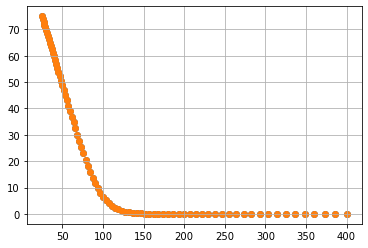

In [31]:
plt.scatter(K * np.exp(xn), K * u[-1, :, Ny // 4])
plt.scatter(K * np.exp(xn), K * uAD[-1, :, Ny // 4])
plt.grid()

np.linalg.norm(u - uAD) / np.linalg.norm(u) * 100